# EDA of Lipophilicity.csv

## Summary
1. There are 4200 experimental records
2. All the SMILES are unique.
3. All the experiments were held at pH=7.4
4. Temperature is not mentioned

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

import sys

DATA_PATH = "../data/raw/logd/"

In [3]:
def check_na(df, column):
    n = df.shape[0]
    num_of_na = df[column].isna().sum()
    frac_of_na = int(100.0*(num_of_na / n))
    print("# of NA values " + column + ": " + str(num_of_na) + ", " + str(frac_of_na) + "%")
    print(df[df[column].isna()].head())

In [4]:
logd_data = pd.read_csv(DATA_PATH + "Lipophilicity.csv", delimiter=",", low_memory=False)
logd_data.head()

,CMPD_CHEMBLID,exp,smiles
0,CHEMBL596271,3.54,Cn1c(CN2CCN(CC2)c3ccc(Cl)cc3)nc4ccccc14
1,CHEMBL1951080,-1.18,COc1cc(OC)c(cc1NC(=O)CSCC(=O)O)S(=O)(=O)N2C(C)...
2,CHEMBL1771,3.69,COC(=O)[C@@H](N1CCc2sccc2C1)c3ccccc3Cl
3,CHEMBL234951,3.37,OC[C@H](O)CN1C(=O)C(Cc2ccccc12)NC(=O)c3cc4cc(C...
4,CHEMBL565079,3.10,Cc1cccc(C[C@H](NC(=O)c2cc(nn2C)C(C)(C)C)C(=O)N...


In [6]:
logd_data = logd_data.drop(columns=["CMPD_CHEMBLID"])
logd_data = logd_data.rename(columns={"exp": "logD"})

In [7]:
logd_data.head()

,logD,smiles
0,3.54,Cn1c(CN2CCN(CC2)c3ccc(Cl)cc3)nc4ccccc14
1,-1.18,COc1cc(OC)c(cc1NC(=O)CSCC(=O)O)S(=O)(=O)N2C(C)...
2,3.69,COC(=O)[C@@H](N1CCc2sccc2C1)c3ccccc3Cl
3,3.37,OC[C@H](O)CN1C(=O)C(Cc2ccccc12)NC(=O)c3cc4cc(C...
4,3.10,Cc1cccc(C[C@H](NC(=O)c2cc(nn2C)C(C)(C)C)C(=O)N...


In [9]:
logd_data.shape

(4200, 3)

In [10]:
# all the experiments were held with pH=7.4
logd_data['pH'] = pd.Series([7.4 for i in range(4200)])

In [12]:
logd_data.head()

,logD,smiles,pH
0,3.54,Cn1c(CN2CCN(CC2)c3ccc(Cl)cc3)nc4ccccc14,7.4
1,-1.18,COc1cc(OC)c(cc1NC(=O)CSCC(=O)O)S(=O)(=O)N2C(C)...,7.4
2,3.69,COC(=O)[C@@H](N1CCc2sccc2C1)c3ccccc3Cl,7.4
3,3.37,OC[C@H](O)CN1C(=O)C(Cc2ccccc12)NC(=O)c3cc4cc(C...,7.4
4,3.10,Cc1cccc(C[C@H](NC(=O)c2cc(nn2C)C(C)(C)C)C(=O)N...,7.4


In [13]:
check_na(logd_data, 'logD')

# of NA values logD: 0, 0%
Empty DataFrame
Columns: [logD, smiles, pH]
Index: []


In [15]:
logd_data = logd_data.drop_duplicates()
logd_data.shape

(4200, 3)

In [17]:
logd_data.smiles.unique().shape

(4200,)

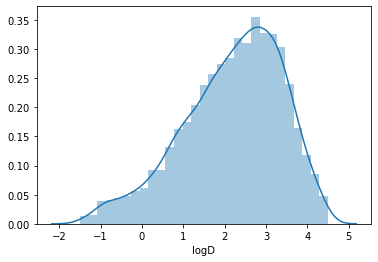

In [18]:
sns.distplot(logd_data.logD)

In [20]:
logd_data.to_csv("../data/1_filtering/logd/logd_lipophilicity_dataset.csv")